# **Task 2: Prediction using Unsupervised ML**

## Name: UDAY ARORA

## Objective: Predicting the optimum number of clusters and represent it visually from the given 'Iris' Dataset.

## **k-means clustering**

In [15]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [36]:
iris = datasets.load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [40]:
iris_df = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
iris_df.head(10)

Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1

### **To find the optimum number of clusters, we need to determine the value of K**

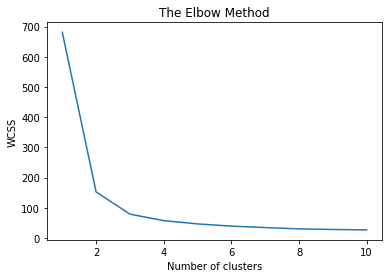

In [46]:
# Finding the optimum number of clusters for k-means classifications

x = iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results into a line graph,
# Obserbing 'the elbow' to predcit the number of optimum clusters

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  #within cluster of sum squares
plt.show()

### **From the above grapth, we see an elbow line at 2,3,4. Lets take the value of k as 3 i.e 3 clusters.**

In [48]:
# Applyting k-means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

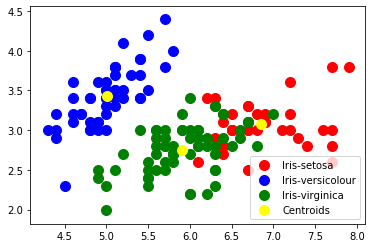

In [51]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### **Conclusion : We have predicted 3 optimum clusters and represented them.**